In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cancer Dataset

In [25]:
dataset1=pd.read_csv('gene_expression.csv')
dataset1

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [2]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [27]:
percent_nan = percent_missing(dataset1)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

ValueError: min() arg is an empty sequence

In [28]:
dataset1['Gene One'].unique()

array([ 4.3,  2.5,  5.7,  6.1,  7.4,  3.4,  3.1,  6.3,  5.5,  7.7,  6.6,
        5.4,  5.2,  8.3,  4.2,  3. ,  4.9,  8.5,  7.2,  3.3,  9.3,  7.8,
        2.4,  6.4,  3.6,  4.6,  9.7,  5. ,  6.8,  5.9,  6.2,  6.7,  4.8,
        3.5,  6.9,  6.5,  2.7,  3.9,  8.4,  3.7,  4.1,  7.1,  2.6,  1.8,
        4.7,  8.9,  8.6,  7.6,  9.1,  4.5,  4. ,  7.3,  2.8,  2.9,  5.6,
        4.4,  7.5,  8.2,  9. ,  5.8,  3.2,  9.4,  2.2,  6. ,  5.3,  5.1,
        7. ,  8.8,  8.7,  2.3,  3.8,  7.9,  8.1,  9.2,  2. ,  9.5,  1.9,
        1.6,  8. ,  1.5,  2.1,  1.2,  1. ,  9.6,  1.7,  9.9, 10. ,  9.8,
        1.3])

In [29]:
dataset1['Gene Two'].unique()

array([ 3.9,  6.3,  6.2,  3.4,  7.5,  6.8,  4.9,  8.6,  3.5,  2.9,  4.5,
        7.2,  5.7,  5.4,  9.3,  7.7,  5.6,  4.2,  3.7,  5.3,  6.4,  5. ,
        6.9,  6.5,  4.8,  3.2,  6.1,  7.3,  5.1,  2.3,  4.1,  4.6,  7.8,
        2.5,  6. ,  6.6,  8.4,  8.8,  7.1,  4.7,  4. ,  3.8,  5.5,  2.4,
        4.3,  7. ,  3.6,  7.4,  2.1,  8.2,  3.3,  6.7,  7.6,  3.1,  9.1,
        8.5,  1.8,  5.9,  2.6,  4.4,  5.2,  2.8,  5.8,  3. ,  8.3,  7.9,
        2.7,  8.1,  9.4,  8. ,  2.2,  1.9,  1.2,  9. ,  8.7,  1. ,  1.4,
        1.6,  1.5,  9.2,  2. ,  1.7,  8.9,  9.8,  9.6,  9.5,  9.7, 10. ])

In [30]:
dataset1['Cancer Present'].unique()

array([1, 0], dtype=int64)

Therefore, there are no missing values

In [31]:
X = dataset1.drop('Cancer Present',axis=1)
y = dataset1['Cancer Present']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [34]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [35]:
log_model.coef_

array([[ 1.11718777, -2.3076671 ]])

In [4]:
from sklearn.metrics import classification_report,accuracy_score

In [37]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8466666666666667

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       136
           1       0.86      0.86      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [5]:
from sklearn.neighbors import KNeighborsClassifier


In [40]:

test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

In [48]:
test_errors

[0.09333333333333338,
 0.10999999999999999,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.08333333333333337,
 0.07666666666666666,
 0.08999999999999997,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.09333333333333338,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.07333333333333336,
 0.07666666666666666]

([<matplotlib.axis.XTick at 0x18c2dd1bc40>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

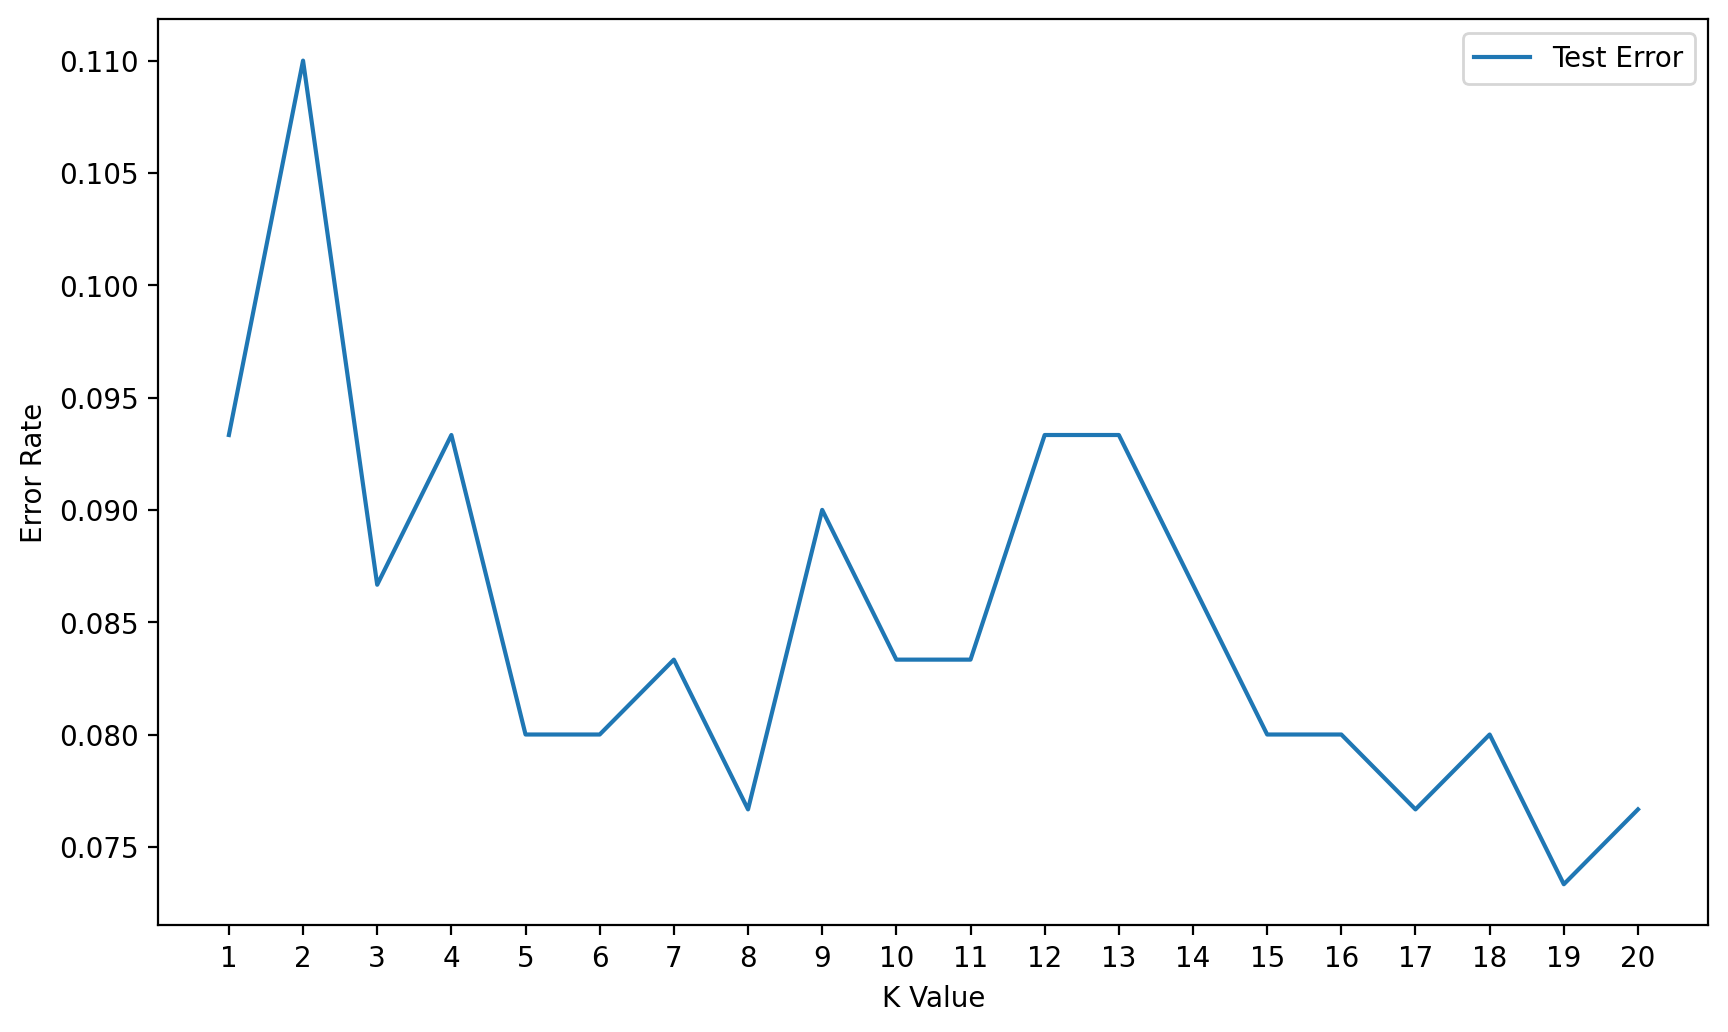

In [47]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

As can be seen here minimum error is at k=19 with error=0.073

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)

In [52]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       136
           1       0.93      0.94      0.93       164

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



SVM

In [6]:
from sklearn.svm import SVC

In [71]:
svc_model = SVC(kernel='linear', C=100)
svc_model.fit(scaled_X_train, y_train)

SVC(C=100, kernel='linear')

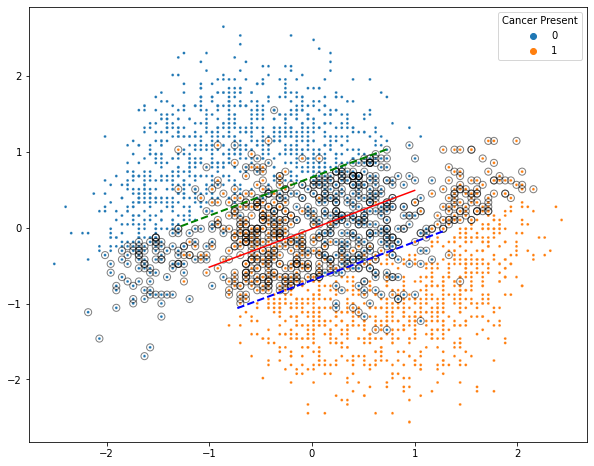

In [72]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=scaled_X_train[:,0],
                y=scaled_X_train[:,1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)

In [73]:
y_pred_svm=svc_model.predict(scaled_X_test)

In [74]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       136
           1       0.85      0.86      0.86       164

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [83]:
svm_model_rbf = SVC(kernel='rbf', C=100)
svm_model_rbf.fit(scaled_X_train, y_train)

SVC(C=100)

In [84]:
y_pred_svm_rbf = svm_model_rbf.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.94      0.93      0.93       164

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [99]:
svm_model_poly = SVC(kernel='poly', C=100,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

SVC(C=100, kernel='poly')

In [100]:
y_pred_svm_poly = svm_model_poly.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       136
           1       0.86      0.87      0.86       164

    accuracy                           0.85       300
   macro avg       0.85      0.84      0.85       300
weighted avg       0.85      0.85      0.85       300



As can be seen, the evaluation metrics are highest when using rbf kernel, so it is the best SVM Model

As for the best from logistic, knn and svm, svm and knn withk=19 have the same accuracy and f1-score 93%

Income Dataset

In [7]:
dataset2=pd.read_csv('train.csv')
dataset2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


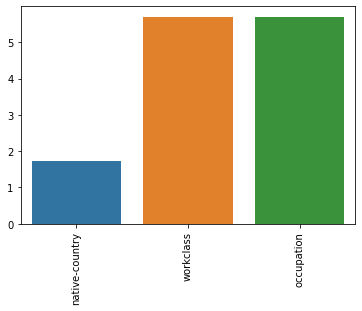

In [8]:
percent_nan = percent_missing(dataset2)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

In [9]:
dataset2['native-country'].fillna(value=dataset2['native-country'].mode()[0],inplace=True)

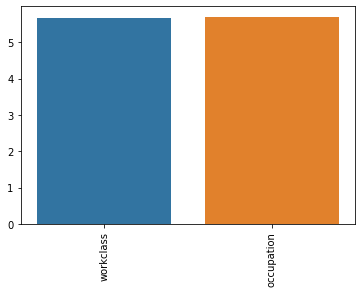

In [10]:
percent_nan = percent_missing(dataset2)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

Observation: whenever there are missing values in work class, the value of the occupation is also missing.
So it's better to drop the rows rather than imputing them

In [11]:
dataset_cleaned=dataset2.dropna(axis=0)
dataset_cleaned

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [12]:
percent_nan = percent_missing(dataset_cleaned)
sns.barplot(x=percent_nan.index,y=percent_nan)

plt.xticks(rotation=90);

ValueError: min() arg is an empty sequence

In [43]:
df_nums=dataset_cleaned.select_dtypes(exclude='object')
df_objs = dataset_cleaned.select_dtypes(include='object')

In [14]:
from sklearn import preprocessing

In [44]:


label_encoder=preprocessing.LabelEncoder()
df_objs['education']=label_encoder.fit_transform(df_objs['education'])
df_objs['occupation']=label_encoder.fit_transform(df_objs['occupation'])
df_objs['workclass']=label_encoder.fit_transform(df_objs['workclass'])
df_objs['marital-status']=label_encoder.fit_transform(df_objs['marital-status'])


df_objs

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,2,10,0,3,Not-in-family,White,Male,United-States
1,2,2,4,7,Own-child,White,Male,United-States
2,2,9,2,3,Husband,White,Male,United-States
3,5,5,2,13,Husband,White,Male,United-States
4,5,15,4,7,Not-in-family,Black,Male,United-States
...,...,...,...,...,...,...,...,...
43952,2,9,2,3,Husband,White,Male,United-States
43953,2,11,4,7,Own-child,White,Female,United-States
43954,2,15,0,11,Not-in-family,White,Male,United-States
43955,2,9,4,11,Not-in-family,White,Female,United-States


In [46]:

df_objs_one_hot=pd.get_dummies(df_objs[['relationship','race','gender','native-country']])
df_objs_final=df_objs_one_hot[['relationship_Husband','relationship_Not-in-family','relationship_Other-relative','relationship_Own-child','relationship_Unmarried','relationship_Wife','gender_Male','native-country_United-States','race_White','race_Black','race_Amer-Indian-Eskimo','race_Asian-Pac-Islander']]
df_objs_final

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male,native-country_United-States,race_White,race_Black,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander
0,0,1,0,0,0,0,1,1,1,0,0,0
1,0,0,0,1,0,0,1,1,1,0,0,0
2,1,0,0,0,0,0,1,1,1,0,0,0
3,1,0,0,0,0,0,1,1,1,0,0,0
4,0,1,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43952,1,0,0,0,0,0,1,1,1,0,0,0
43953,0,0,0,1,0,0,0,1,1,0,0,0
43954,0,1,0,0,0,0,1,1,1,0,0,0
43955,0,1,0,0,0,0,0,1,1,0,0,0


In [49]:
df_objs.drop(columns=['relationship','gender','native-country','race'],axis=1,inplace=True)
final_df=pd.concat([df_nums,df_objs,df_objs_final],axis=1)
final_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass,education,marital-status,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Male,native-country_United-States,race_White,race_Black,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander
0,67,366425,16,99999,0,60,1,2,10,0,...,0,0,0,0,1,1,1,0,0,0
1,17,244602,8,0,0,15,0,2,2,4,...,0,1,0,0,1,1,1,0,0,0
2,31,174201,13,0,0,40,1,2,9,2,...,0,0,0,0,1,1,1,0,0,0
3,58,110199,4,0,0,40,0,5,5,2,...,0,0,0,0,1,1,1,0,0,0
4,25,149248,10,0,0,40,0,5,15,4,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,2,9,2,...,0,0,0,0,1,1,1,0,0,0
43953,19,116562,9,0,0,40,0,2,11,4,...,0,1,0,0,0,1,1,0,0,0
43954,30,197947,10,0,0,58,0,2,15,0,...,0,0,0,0,1,1,1,0,0,0
43955,46,97883,13,0,0,35,0,2,9,4,...,0,0,0,0,0,1,1,0,0,0


In [50]:
X = final_df.drop('income_>50K',axis=1)
y = final_df['income_>50K']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [52]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [53]:
y_pred = log_model.predict(scaled_X_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3119
           1       0.70      0.56      0.62      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.74      0.76      4146
weighted avg       0.82      0.83      0.83      4146



In [55]:
test_errors = []


for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_errors.append(test_error)

([<matplotlib.axis.XTick at 0x1712ed43f70>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

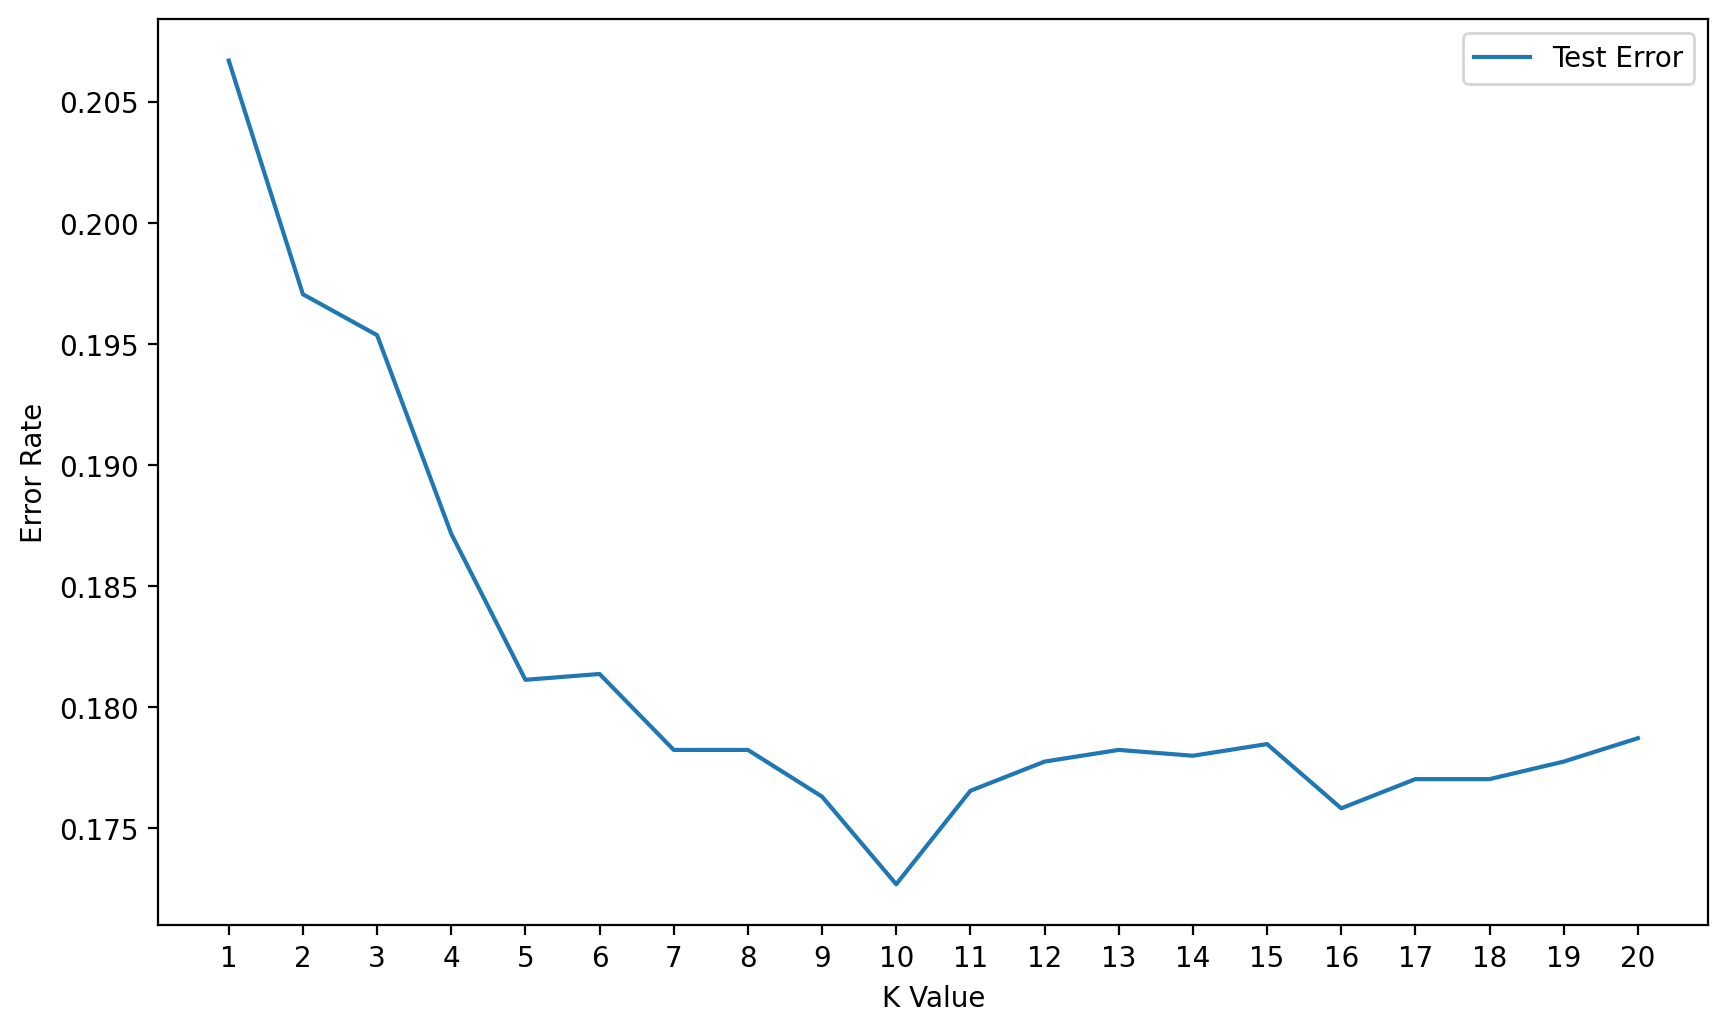

In [56]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_errors,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(range(1,21,1))

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(scaled_X_train,y_train)
y_pred_test = knn_model.predict(scaled_X_test)

In [58]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3119
           1       0.71      0.52      0.60      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.72      0.74      4146
weighted avg       0.82      0.83      0.82      4146



In [59]:
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(scaled_X_train, y_train)

SVC(C=1, kernel='linear')

In [60]:
y_pred_svm=svc_model.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3119
           1       0.69      0.56      0.62      1027

    accuracy                           0.83      4146
   macro avg       0.78      0.74      0.75      4146
weighted avg       0.82      0.83      0.82      4146



In [61]:
svm_model_rbf = SVC(kernel='rbf', C=1)
svm_model_rbf.fit(scaled_X_train, y_train)

SVC(C=1)

In [62]:
y_pred_svm_rbf=svm_model_rbf.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3119
           1       0.73      0.56      0.63      1027

    accuracy                           0.84      4146
   macro avg       0.80      0.75      0.77      4146
weighted avg       0.83      0.84      0.83      4146



In [65]:
svm_model_poly = SVC(kernel='poly', C=1,degree=3)
svm_model_poly.fit(scaled_X_train, y_train)

SVC(C=1, kernel='poly')

In [66]:
y_pred_svm_poly=svm_model_poly.predict(scaled_X_test)
print(classification_report(y_test, y_pred_svm_poly))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3119
           1       0.73      0.54      0.62      1027

    accuracy                           0.84      4146
   macro avg       0.80      0.74      0.76      4146
weighted avg       0.83      0.84      0.83      4146

